In [99]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [100]:
pip install -q keras

In [123]:
import keras
import pandas as pd
import numpy as np

In [124]:
data = pd.read_csv("gdrive/My Drive/Churn_Modelling.csv")

In [125]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [126]:
data.shape

(10000, 14)

In [127]:
X = data.iloc[:,3:13]
y = data.iloc[:,13]

In [128]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [129]:
y.unique()

array([1, 0])

In [130]:
X.isnull().sum().sum()

0

In [131]:
X_new = pd.get_dummies(X,drop_first=True)
X_new.shape

(10000, 11)

In [132]:
X_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train,X_val,y_train,y_val = train_test_split(X_new,y,test_size=.2,random_state=0)

In [135]:
from sklearn.preprocessing import StandardScaler

In [136]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)

In [137]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [138]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import ReLU,LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras import regularizers

In [139]:
classifiers = Sequential()

In [140]:
classifiers.add(Dense(6,kernel_initializer='he_uniform',activation='relu',input_dim=11))
classifiers.add(Dense(6,kernel_initializer='he_uniform',activation='relu'))
classifiers.add(Dense(1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [141]:
classifiers.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 6)                 72        
_________________________________________________________________
dense_35 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


compiling the ANN

In [142]:
opt = keras.optimizers.Adamax()
classifiers.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

fitting the ANN to the training set

In [143]:
model_history = classifiers.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 1.0440 - accuracy: 0.3801 - val_loss: 0.7424 - val_accuracy: 0.5559
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.6467 - accuracy: 0.6955 - val_loss: 0.5831 - val_accuracy: 0.7781
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5533 - accuracy: 0.7903 - val_loss: 0.5309 - val_accuracy: 0.7967
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5170 - accuracy: 0.7987 - val_loss: 0.5073 - val_accuracy: 0.7993
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4961 - accuracy: 0.8011 - val_loss: 0.4915 - val_accuracy: 0.8008
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4810 - accuracy: 0.8044 - val_loss: 0.4803 - val_accuracy: 0.8058
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4697 - accuracy: 0.8100 - val_loss: 0.4709 - val_accuracy: 0.8073

In [144]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [145]:
import matplotlib.pyplot as plt


Plot for accuracy

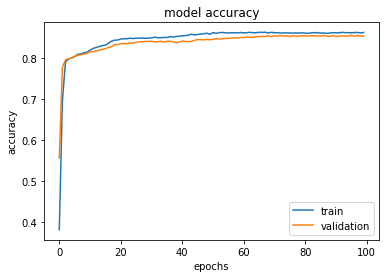

In [146]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','validation'])
plt.show()

Plot for loss

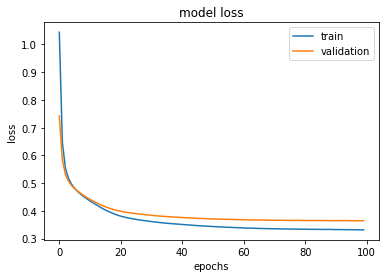

In [147]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()

Prediction the test set result

In [148]:
y_pred = classifiers.predict(X_val)
y_pred =(y_pred>0.5)

In [149]:
from sklearn.metrics import accuracy_score

In [150]:
print(accuracy_score(y_pred,y_val))

0.862


In [151]:
from sklearn.metrics import confusion_matrix

In [152]:
print(confusion_matrix(y_pred,y_val))

[[1519  200]
 [  76  205]]


In [153]:
from sklearn.metrics import classification_report

In [154]:
print(classification_report(y_pred,y_val))

              precision    recall  f1-score   support

       False       0.95      0.88      0.92      1719
        True       0.51      0.73      0.60       281

    accuracy                           0.86      2000
   macro avg       0.73      0.81      0.76      2000
weighted avg       0.89      0.86      0.87      2000

